In [28]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

dataset = pd.read_csv("csv-data-files/titanic/train.csv")



# ***********************  1. Data exploration and visualization   ***************************
'''
For a good start, we should look at the dataset. Analyze the features and think which could be 
useful to predict the survival rate. The features that probably may have an influence 
are: the "P-class" (expect to see more survival for higher class), the "Sex" and 
"Age" ("women and children first"), and let's say "Embarked" also.
'''

#To get an idea about the dataset(Dataframe) use the describe() and head() functions in pandas
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
#-------------------Survived/Died by Class -------------------------------------
#survived කට්ටියගේ ඒ ඒ class වල count එක අනුව හා මරුන කට්ටිය ඒ ඒ class වල counts එක අනුව බලමු.
survived_class = dataset[dataset.Survived == 1]['Pclass'].value_counts()
dead_class = dataset[dataset.Survived == 0]['Pclass'].value_counts()

df_class = pd.DataFrame([survived_class, dead_class])
df_class.index = ['Survived', 'Dead']
df_class.head()

,1,2,3
Survived,136,87,119
Dead,80,97,372


In [3]:
# So we can see that there are more survivers in 1st class and low deads in first class. 
# So there is a relation ship between class and Survival

In [4]:
#-------------------Survived/Died by Sex -------------------------------------
survived_sex = dataset[dataset.Survived == 1]['Sex'].value_counts()
dead_sex = dataset[dataset.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([survived_sex, dead_sex])
df_sex.index = ['Survived', 'Dead']
df_sex.head()

,female,male
Survived,233,109
Dead,81,468


In [5]:
# So we can see that there more females has survived and more males have died.
# So there is a relationship between sex and survival.

In [6]:
#-------------------- Survived/Died by Embarked (නැව් නගපු තැන අනුව)----------------------------
survived_embark = dataset[dataset.Survived == 1]['Embarked'].value_counts()
dead_embark = dataset[dataset.Survived == 0]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark, dead_embark])
df_embark.index = ['Survived', 'Dead']
df_embark.head()

,S,C,Q
Survived,217,93,30
Dead,427,75,47


In [7]:
# **************   2. Data cleaning, Feature selection and Feature engineering   ******************

In [8]:
'''
The preprocessing of the data is a quite crucial part. If we just give the dataset without 
cleaning it, most probably the results will not be good! So, in this step we will preprocess
the training dataset and this will involve feature selection, data cleaning, and feature engineering.

As we saw previously, "P-Class", "Sex", "Age" and "Embarked" showed some relation with Survived rate. 
Thus, we will drop the remaining features, except "Name" because it will be useful in a further 
step of the cleaning process.
'''

X = dataset.drop(['SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)
Y = X.Survived #Vector of Labels (dependent variable)
X = X.drop(['Survived'], axis=1)
X.head(10)

,PassengerId,Pclass,Name,Sex,Age,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,5,3,"Allen, Mr. William Henry",male,35.0,S
5,6,3,"Moran, Mr. James",male,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


In [9]:
# We can see, from this displayed DataFrame, that "Sex" and "Embarked" are categorical features 
# and have strings instead of numeric values. We need to encode these strings into numeric data.

'''
The Famous way of doing this is by using the get_dummies from pandas. We will be using this to
encode the "Embarked" feature. But first, as "Embarked" has two NaN values we need to take care of
these missing values. In this approach, I will provide the 'S' category because it is the most 
frequent in the data. After this, it is then possible to use the get_dummies and get three new 
columns (Embarked_C, Embarked_Q, Embarked_S) which are called dummy variables (they assign ‘0’ and ‘1’ 
to indicate membership in a category). The previous "Embarked" can be dropped from X as it will not be 
needed anymore and we can now concatenate the X dataframe with the new "Embarked" which has the three 
dummy variables. Finally, as the number of dummy variables necessary to represent a single feature is 
equal to the number of categories in that feature minus one, we can remove one of the dummies created, 
lets say Embarked_S, for example. This will not remove any information because by having the values 
from Embarked_C and Embarked_Q the algorithm can easily understand the values from the remaining dummy 
variable (when Embarked_C and Embarked_Q are '0' Embarked_S will be '1', otherwise it will be '0').
'''

# Encode Sex
sex_dummies = pd.get_dummies(X['Sex'], prefix="Sex")
X = X.drop(['Sex'], axis=1)
X = X.join(sex_dummies)
X.head(6)

,PassengerId,Pclass,Name,Age,Embarked,Sex_female,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,C,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,S,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,S,1,0
4,5,3,"Allen, Mr. William Henry",35.0,S,0,1
5,6,3,"Moran, Mr. James",NaN,Q,0,1


In [10]:
# As we said earlier here also it is enough to have one column to represent sex. So let's remove one
X = X.drop(['Sex_female'], axis=1) #then in ramaining column mails will be 1 and females will be 0

# Then rename the column. inplace is to rename on the current DataFrame X without copping and making another X.
X.rename(columns={'Sex_male': 'Sex'}, inplace=True)
X.head()

,PassengerId,Pclass,Name,Age,Embarked,Sex
0,1,3,"Braund, Mr. Owen Harris",22.0,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,S,0
4,5,3,"Allen, Mr. William Henry",35.0,S,1


In [11]:
# Put S to any missing (NaN) values of Embarked. First lets find how many NaNs are there in Embarked
print("Number of missing values in Embarked is: " + str(sum(X.Embarked.isnull())))

Number of missing values in Embarked is: 2


In [12]:
row_index = X.Embarked.isnull()
X.loc[row_index, 'Embarked'] = 'S'

#Encoding Embarked
embarked_dummies = pd.get_dummies(X.Embarked, prefix="Embarked")
X.drop(['Embarked'], axis=1, inplace=True)
X = pd.concat([X, embarked_dummies], axis=1)
X.head()

,PassengerId,Pclass,Name,Age,Sex,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,0,0,0,1
4,5,3,"Allen, Mr. William Henry",35.0,1,0,0,1


In [13]:
# As stated earlier lets remove one column from dummies (['Embarked_S'])
X.drop(['Embarked_S'], axis=1, inplace=True)
X.head(6)

,PassengerId,Pclass,Name,Age,Sex,Embarked_C,Embarked_Q
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,0,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,0,0,0
4,5,3,"Allen, Mr. William Henry",35.0,1,0,0
5,6,3,"Moran, Mr. James",NaN,1,0,1


In [14]:
#Now lets go for column Age. Lets check all of Age column is filled
print("Number of missing values in Age :" + str(sum(X.Age.isnull())))

Number of missing values in Age :177


In [15]:
'''
So there are 177 reocrds which lack Age detail. If Rremove 177 rows (which is quite a lot!) we would have less 
information to create the model. In some cases, it is acceptable to take the average (mean) of the column and 
replace the null values, nonethelessin this case, it is possible to estimate the age of the person by their
title (Mr, Miss, Mrs), present in the "Name" column.

Therefore, We will first identify the different titles presented and then average the Age for each title. 
We can provide this averaged Age found for each title to the people with missing Age values, accordingly 
to their title in "Name". Then After using the inflormation in "Name" we can drop the "Name" column.
'''

# Convert Names to their Titles (Mr, Miss, Mrs)
titles = X.Name.str.split(',').str[1]
titles = titles.str.split('\s+').str[1]
titles.head()
X.iloc[:,2] = pd.DataFrame(titles)
X.head()

,PassengerId,Pclass,Name,Age,Sex,Embarked_C,Embarked_Q
0,1,3,Mr.,22.0,1,0,0
1,2,1,Mrs.,38.0,0,1,0
2,3,3,Miss.,26.0,0,0,0
3,4,1,Mrs.,35.0,0,0,0
4,5,3,Mr.,35.0,1,0,0


In [16]:
gp = X.groupby('Name').mean()
gp

,PassengerId,Pclass,Age,Sex,Embarked_C,Embarked_Q
Name,,,,,,
Capt.,746.000000,1.000000,70.000000,1.000000,0.000000,0.000000
Col.,671.500000,1.000000,58.000000,1.000000,0.500000,0.000000
Don.,31.000000,1.000000,40.000000,1.000000,1.000000,0.000000
Dr.,545.857143,1.285714,42.000000,0.857143,0.285714,0.142857
Jonkheer.,823.000000,1.000000,38.000000,1.000000,0.000000,0.000000
Lady.,557.000000,1.000000,48.000000,0.000000,1.000000,0.000000
Major.,493.500000,1.000000,48.500000,1.000000,0.000000,0.000000
Master.,414.975000,2.625000,4.574167,1.000000,0.125000,0.100000
Miss.,408.884615,2.307692,21.773973,0.000000,0.208791,0.181319


In [17]:
title_mean_ages = []
title_mean_ages.append(gp.index)
title_mean_ages.append(X.groupby('Name').Age.mean())
title_mean_ages

[Index([u'Capt.', u'Col.', u'Don.', u'Dr.', u'Jonkheer.', u'Lady.', u'Major.',
        u'Master.', u'Miss.', u'Mlle.', u'Mme.', u'Mr.', u'Mrs.', u'Ms.',
        u'Rev.', u'Sir.', u'the'],
       dtype='object', name=u'Name'), Name
 Capt.        70.000000
 Col.         58.000000
 Don.         40.000000
 Dr.          42.000000
 Jonkheer.    38.000000
 Lady.        48.000000
 Major.       48.500000
 Master.       4.574167
 Miss.        21.773973
 Mlle.        24.000000
 Mme.         24.000000
 Mr.          32.368090
 Mrs.         35.898148
 Ms.          28.000000
 Rev.         43.166667
 Sir.         49.000000
 the          33.000000
 Name: Age, dtype: float64]

In [18]:
n_training_samples = X.shape[0] #axis 0 is the column which has names of rows. or its the index.
n_titles = len(title_mean_ages[1])

for i in range(0, n_training_samples):
    if np.isnan(X.Age[i]) == True:
        for j in range(0, n_titles):
            if X.Name[i] == title_mean_ages[0][j]:
                X.Age[i] = title_mean_ages[1][j]

X.head(10)

,PassengerId,Pclass,Name,Age,Sex,Embarked_C,Embarked_Q
0,1,3,Mr.,22.00000,1,0,0
1,2,1,Mrs.,38.00000,0,1,0
2,3,3,Miss.,26.00000,0,0,0
3,4,1,Mrs.,35.00000,0,0,0
4,5,3,Mr.,35.00000,1,0,0
5,6,3,Mr.,32.36809,1,0,1
6,7,1,Mr.,54.00000,1,0,0
7,8,3,Master.,2.00000,1,0,0
8,9,3,Mrs.,27.00000,0,0,0
9,10,2,Mrs.,14.00000,0,1,0


In [19]:
# Now we can drop name axis
X.drop(['Name'], axis=1, inplace=True)
X.head()

,PassengerId,Pclass,Age,Sex,Embarked_C,Embarked_Q
0,1,3,22.0,1,0,0
1,2,1,38.0,0,1,0
2,3,3,26.0,0,0,0
3,4,1,35.0,0,0,0
4,5,3,35.0,1,0,0


In [20]:
# Lets feature Transform (Data normalization) the Age column so that its values are in between 0 and 1
# Lets use Min Max algorithum for that.
age_min = X['Age'].min()
age_max = X.Age.max()
range_ = age_max - age_min


for i in range(n_training_samples):
    X.Age[i] = (X.Age[i] - age_min) / range_

print(Y.shape)
X.head()

(891,)


,PassengerId,Pclass,Age,Sex,Embarked_C,Embarked_Q
0,1,3,0.271174,1,0,0
1,2,1,0.472229,0,1,0
2,3,3,0.321438,0,0,0
3,4,1,0.434531,0,0,0
4,5,3,0.434531,1,0,0


In [21]:
# Now, we can say that we have a quite well clean dataset to provide to our classifier algorithm.

# ************************   3. Build the neural network from Tensorflow   *****************************

X_withoult_passengerId = X.drop(['PassengerId'], axis=1)
X_numpy = X_withoult_passengerId.values #converting to a numpy ndarray
print("type of X_numpy is : "+ str(type(X_numpy)) + " and shape of it is : " + str(X_numpy.shape))
X_numpy[0:2]

#make labels in correct shape
Y_ = np.random.rand(891,1)
for i in range(len(Y)):
    Y_[i] = Y[i]
Y_.shape

split_size = int(0.8 * len(Y_))

train_x = X_numpy[:split_size]
train_y = Y_[:split_size]
test_x = X_numpy[split_size:]
test_y = Y_[split_size:]


type of X_numpy is : <type 'numpy.ndarray'> and shape of it is : (891, 5)


('Epoch', 0, ' completed out of ', 30, ' loss: ', 59.48034119606018)
('Epoch', 1, ' completed out of ', 30, ' loss: ', 58.46140205860138)
('Epoch', 2, ' completed out of ', 30, ' loss: ', 57.81109854578972)
('Epoch', 3, ' completed out of ', 30, ' loss: ', 57.29391351342201)
('Epoch', 4, ' completed out of ', 30, ' loss: ', 56.83225551247597)
('Epoch', 5, ' completed out of ', 30, ' loss: ', 56.394849210977554)
('Epoch', 6, ' completed out of ', 30, ' loss: ', 55.97279581427574)
('Epoch', 7, ' completed out of ', 30, ' loss: ', 55.56357327103615)
('Epoch', 8, ' completed out of ', 30, ' loss: ', 55.16391435265541)
('Epoch', 9, ' completed out of ', 30, ' loss: ', 54.7757234275341)
('Epoch', 10, ' completed out of ', 30, ' loss: ', 54.40076473355293)
('Epoch', 11, ' completed out of ', 30, ' loss: ', 54.0348225235939)
('Epoch', 12, ' completed out of ', 30, ' loss: ', 53.67770630121231)
('Epoch', 13, ' completed out of ', 30, ' loss: ', 53.329914182424545)
('Epoch', 14, ' completed out 

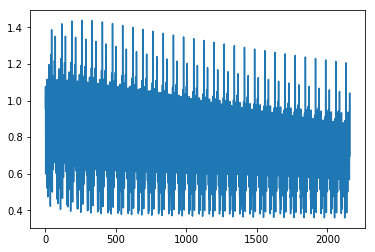

In [22]:
# Define Placeholders
x = tf.placeholder(tf.float32, shape=[None, 5])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

h1_nodes = 4
h2_nodes = 4
h3_nodes = 4
output_nodes = 1
batch_size = 10
import math

# Create the model
def model(data):
    hidden_layer_1 = {
        'weights' : tf.Variable(tf.random_normal([5, h1_nodes])),
        'bias' : tf.Variable(tf.random_normal([h1_nodes]))
    }
    
    hidden_layer_2 = {
        'weights' : tf.Variable(tf.random_normal([h1_nodes, h2_nodes])),
        'bias' : tf.Variable(tf.random_normal([h2_nodes]))
    }
    
    hidden_layer_3 = {
        'weights' : tf.Variable(tf.random_normal([h2_nodes, h3_nodes])),
        'bias' : tf.Variable(tf.random_normal([h3_nodes]))
    }
    
    output_layer = {
        'weights' : tf.Variable(tf.random_normal([h3_nodes, output_nodes])),
        'bias' : tf.Variable(tf.random_normal([output_nodes]))
    }
    
    operation_h1 = tf.add(tf.matmul(data, hidden_layer_1['weights']), hidden_layer_1['bias'])
    operation_h1 = tf.nn.relu(operation_h1)
    
    operation_h2 = tf.add(tf.matmul(operation_h1, hidden_layer_2['weights']), hidden_layer_2['bias'])
    operation_h2 = tf.nn.relu(operation_h2)
    
    operation_h3 = tf.add(tf.matmul(operation_h2, hidden_layer_3['weights']), hidden_layer_3['bias'])
    operaion_h3 = tf.nn.relu(operation_h3)
    
    output = tf.add(tf.matmul(operation_h3, output_layer['weights']), output_layer['bias'])
    
    return output

def training(features):
    prediction = model(features)
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=prediction, labels=y_))
    optimizer = tf.train.AdamOptimizer(0.0001).minimize(loss)
    
    #save file location and Saver object
    save_file = './train_model.ckpt'
    saver = tf.train.Saver()

    loss_array = []
    
    num_epochs = 30
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(num_epochs):
            epoch_loss = 0
            i = 0
            while i < len(X_numpy):
                start = i
                end = i + batch_size
                batch_x = np.array(train_x[start:end])
                batch_y = np.array(train_y[start:end])
                _, c = sess.run([optimizer, loss], feed_dict={x:batch_x, y_:batch_y})
                if not math.isnan(c):
                    epoch_loss += c
                    loss_array.append(c)
                i += batch_size
            
            print('Epoch', epoch, ' completed out of ', num_epochs, ' loss: ', epoch_loss)
        
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float32'))
        print('Accuracy : ', accuracy.eval({x:test_x, y_:test_y}))
        
        #save the model (this save process should done within the session)
        saver.save(sess, save_file)
        print("Trained model saved")

        
    plt.plot(loss_array)
    plt.show()

# call the training function
training(x)
            